<a href="https://colab.research.google.com/github/Saul-Ochoa/RepositorioUPC/blob/main/Projecto_Mermelada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mermeladas
* Autores = Saúl Kevin Ochoa Salazar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import dirichlet

In [ ]:
import pandas as pd

data = {
    "Bloques": [
        "Propuesta de Valor",
        "Segmentación de Mercado",
        "Canales",
        "Fuentes de Ingresos",
        "Recursos Claves",
        "Actividades Claves",
        "Relación con los Clientes",
        "Socios Claves",
        "Permisos Claves",
        "Estructura de Costos",
        "Experiencias y Aprendizajes",
        "Interacciones y Mejoras Continuas"
    ],
    "Pesos": [
        "20%",
        "15%",
        "15%",
        "12%",
        "10%",
        "10%",
        "8%",
        "5%",
        "2%",
        "2%",
        "1%",
        "1%"
    ],
    "Avance": [
        "86%",
        "80%",
        "58%",
        "54%",
        "58%",
        "60%",
        "52%",
        "64%",
        "36%",
        "46%",
        "50%",
        "48%"
    ]
}

df = pd.DataFrame(data)

print(df)


                              Bloques Pesos Avance
0                  Propuesta de Valor   20%    86%
1             Segmentación de Mercado   15%    80%
2                             Canales   15%    58%
3                 Fuentes de Ingresos   12%    54%
4                     Recursos Claves   10%    58%
5                  Actividades Claves   10%    60%
6           Relación con los Clientes    8%    52%
7                       Socios Claves    5%    64%
8                     Permisos Claves    2%    36%
9                Estructura de Costos    2%    46%
10        Experiencias y Aprendizajes    1%    50%
11  Interacciones y Mejoras Continuas    1%    48%


In [ ]:
df.head(11)

,Bloques,Pesos,Avance
0,Propuesta de Valor,20%,86%
1,Segmentación de Mercado,15%,80%
2,Canales,15%,58%
3,Fuentes de Ingresos,12%,54%
4,Recursos Claves,10%,58%
5,Actividades Claves,10%,60%
6,Relación con los Clientes,8%,52%
7,Socios Claves,5%,64%
8,Permisos Claves,2%,36%
9,Estructura de Costos,2%,46%


In [ ]:
# Convertir los valores de la columna "Pesos" y "Avance" a números decimales
df['Pesos'] = df['Pesos'].str.rstrip('%').astype(float) / 100
df['Avance'] = df['Avance'].str.rstrip('%').astype(float) / 100

In [ ]:
df.head(11)

,Bloques,Pesos,Avance
0,Propuesta de Valor,0.20,0.86
1,Segmentación de Mercado,0.15,0.80
2,Canales,0.15,0.58
3,Fuentes de Ingresos,0.12,0.54
4,Recursos Claves,0.10,0.58
5,Actividades Claves,0.10,0.60
6,Relación con los Clientes,0.08,0.52
7,Socios Claves,0.05,0.64
8,Permisos Claves,0.02,0.36
9,Estructura de Costos,0.02,0.46


In [ ]:
# Calcular la suma ponderada de "Pesos" y "Avance"
suma_ponderada = (df['Pesos'] * df['Avance']).sum()

print("Suma ponderada:", suma_ponderada)

Suma ponderada: 0.6616


In [ ]:
# Parámetros para la distribución Dirichlet
alpha = np.ones(len(df))
simulations = 10000
results = []

for _ in range(simulations):
    # Generar pesos aleatorios que sumen 1 utilizando la distribución Dirichlet
    random_weights = dirichlet.rvs(alpha, size=1).flatten()

    # Calcular la suma ponderada de "Pesos" y "Avance"
    weighted_sum = (df["Avance"] * random_weights).sum()
    results.append(weighted_sum)
print(results)


[0.5745732213767158, 0.6138947634099186, 0.5570449463643896, 0.6185995071699022, 0.581375200222132, 0.6107663794739555, 0.568228891944918, 0.5490060513541305, 0.6072010200840469, 0.5056558952684119, 0.5822744894636152, 0.5902231348683279, 0.5849252661279145, 0.6314312694136799, 0.5925897520610278, 0.5634425134162261, 0.5354546102012199, 0.5265943271911944, 0.5276026414167295, 0.5655614629813646, 0.5728737354509056, 0.5897359476350349, 0.6563456420666659, 0.5997863130060036, 0.5541480268414033, 0.593532659604019, 0.5671316176259037, 0.530299994288058, 0.5646864570936373, 0.599707016386917, 0.5606336857119362, 0.6111635015911507, 0.5933319806548941, 0.5539162600313932, 0.5895299944124214, 0.5017168477685464, 0.5740777923441923, 0.6246505798194133, 0.5925931065569443, 0.5067662524504433, 0.5788078525502576, 0.5325606451760103, 0.5998543930442772, 0.5972855305815279, 0.5556673918514003, 0.5619273988471073, 0.5878474838510331, 0.6448091893333916, 0.5714430156412318, 0.52527199943547, 0.5831

In [ ]:
max_value = max(results)
min_value=min(results)
mean_value=sum(results)/len(results)
print("El máximo valor en la lista results es:", max_value)
print("El minimo valor en la lista results es:", min_value)
print("El promedio valor en la lista results es:", mean_value)

El máximo valor en la lista results es: 0.7412179410086892
El minimo valor en la lista results es: 0.4355798271103002
El promedio valor en la lista results es: 0.5766148062961398


In [ ]:
df_new = pd.DataFrame({"Simulaciones": results})
df_new.head()

,Simulaciones
0,0.574573
1,0.613895
2,0.557045
3,0.618600
4,0.581375


In [ ]:
df_new.describe()

,Simulaciones
count,10000.000000
mean,0.576615
std,0.036816
min,0.435580
25%,0.551250
50%,0.574171
75%,0.599206
max,0.741218


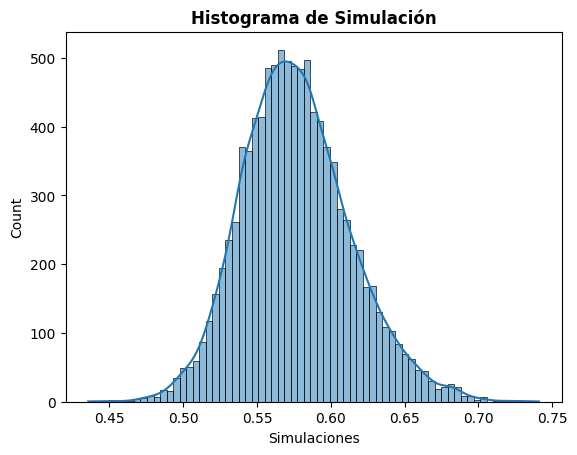

In [ ]:
sns.histplot(df_new['Simulaciones'],kde=True)
plt.title('Histograma de Simulación',fontsize=12,weight='bold')
plt.show()

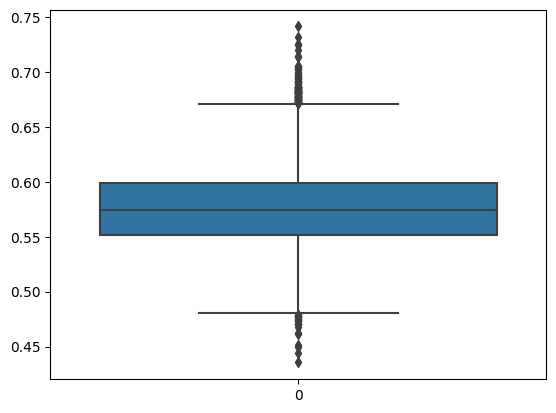

In [ ]:
sns.boxplot(df_new['Simulaciones'])
plt.show()

In [ ]:
# Crear la serie con el nombre "Simulaciones"
df_new = pd.Series(results, name="Simulaciones")

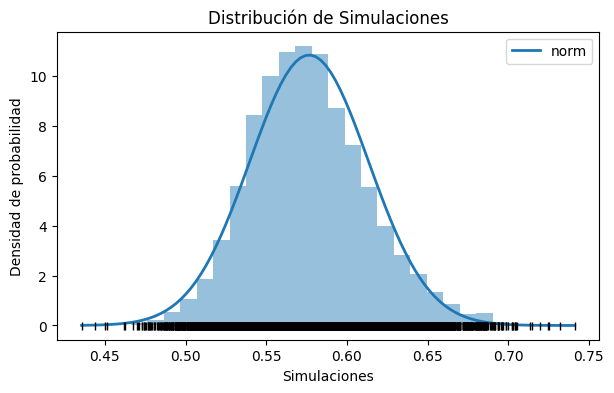

---------------------
Resultados del ajuste
---------------------
Distribución:   norm
Dominio:        [-inf, inf]
Parámetros:     {'loc': 0.5766148062961356, 'scale': 0.03681377010157132}
Log likelihood: 18829.447830505793
AIC:            -37654.895661011586
BIC:            -37640.47498026763


In [ ]:
# Ajuste distribución normal
#===============================================================================
# 1) Se define el tipo de distribución
from scipy import stats
import inspect
distribucion = stats.norm

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=df_new)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(df_new.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(df_new.shape[0]) * len(parametros)

# 5) Gráfico
# Generar datos con la distribución ajustada
x_hat = np.linspace(min(df_new), max(df_new), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=df_new, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(df_new, np.full_like(df_new, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de Simulaciones')
ax.set_xlabel('Simulaciones')
ax.set_ylabel('Densidad de probabilidad')
ax.legend()
plt.show()

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")
print(f"Log likelihood: {log_likelihood}")
print(f"AIC:            {aic}")
print(f"BIC:            {bic}")

In [ ]:
def seleccionar_distribuciones(familia='realall', verbose=True):
    distribuciones = [getattr(stats,d) for d in dir(stats) \
                     if isinstance(getattr(stats,d), (stats.rv_continuous, stats.rv_discrete))]

    exclusiones = ['levy_stable', 'vonmises']
    distribuciones = [dist for dist in distribuciones if dist.name not in exclusiones]

    dominios = {
        'realall' : [-np.inf, np.inf],
        'realline': [np.inf,np.inf],
        'realplus': [0, np.inf],
        'real0to1': [0, 1],
        'discreta': [None, None],
    }

    distribucion = []
    tipo = []
    dominio_inf = []
    dominio_sup = []

    for dist in distribuciones:
        distribucion.append(dist.name)
        tipo.append(np.where(isinstance(dist, stats.rv_continuous), 'continua', 'discreta'))
        dominio_inf.append(dist.a)
        dominio_sup.append(dist.b)

    info_distribuciones = pd.DataFrame({
                            'distribucion': distribucion,
                            'tipo': tipo,
                            'dominio_inf': dominio_inf,
                            'dominio_sup': dominio_sup
                          })

    info_distribuciones = info_distribuciones \
                          .sort_values(by=['dominio_inf', 'dominio_sup'])\
                          .reset_index(drop=True)

    if familia in ['realall', 'realline', 'realplus', 'real0to1']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='continua']
        condicion = (info_distribuciones['dominio_inf'] == dominios[familia][0]) & \
                    (info_distribuciones['dominio_sup'] == dominios[familia][1])
        info_distribuciones = info_distribuciones[condicion].reset_index(drop=True)

    if familia in ['discreta']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='discreta']

    seleccion = [dist for dist in distribuciones \
                 if dist.name in info_distribuciones['distribucion'].values]


    if verbose:
        print("---------------------------------------------------")
        print("       Distribuciones seleccionadas                ")
        print("---------------------------------------------------")
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            print(info_distribuciones)

    return seleccion


def comparar_distribuciones(x, familia='realall', ordenar='aic', verbose=True):
    '''
    Esta función selecciona y ajusta un subconjunto de las distribuciones
    disponibles en scipy.stats. Para cada distribución calcula los valores de
    Log Likelihood, AIC y BIC.

    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.

    familia : {'realall', 'realline', 'realplus', 'real0to1', 'discreta'}
        realall: distribuciones de la familia `realline` + `realplus`
        realline: distribuciones continuas en el dominio (-inf, +inf)
        realplus: distribuciones continuas en el dominio [0, +inf)
        real0to1: distribuciones continuas en el dominio [0,1]
        discreta: distribuciones discretas

    ordenar : {'aic', 'bic'}
        criterio de ordenación de mejor a peor ajuste.

    verbose : bool
        Si se muestra información de las distribuciones seleccionadas
        (the default `True`).

    Returns
    -------
    resultados: data.frame
        distribucion: nombre de la distribución.
        log_likelihood: logaritmo del likelihood del ajuste.
        aic: métrica AIC.
        bic: métrica BIC.
        n_parametros: número de parámetros de la distribución de la distribución.
        parametros: parámetros del tras el ajuste

    Raises
    ------
    Exception
        Si `familia` es distinto de 'realall', 'realline', 'realplus', 'real0to1',
        o 'discreta'.

    Notes
    -----

    '''

    distribuciones = seleccionar_distribuciones(familia=familia, verbose=verbose)
    distribucion_ = []
    log_likelihood_= []
    aic_ = []
    bic_ = []
    n_parametros_ = []
    parametros_ = []

    for i, distribucion in enumerate(distribuciones):

        print(f"{i+1}/{len(distribuciones)} Ajustando distribución: {distribucion.name}")

        try:
            parametros = distribucion.fit(data=x)
            nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                                 if not p=='x'] + ["loc","scale"]
            parametros_dict = dict(zip(nombre_parametros, parametros))
            log_likelihood = distribucion.logpdf(x, *parametros).sum()
            aic = -2 * log_likelihood + 2 * len(parametros)
            bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

            distribucion_.append(distribucion.name)
            log_likelihood_.append(log_likelihood)
            aic_.append(aic)
            bic_.append(bic)
            n_parametros_.append(len(parametros))
            parametros_.append(parametros_dict)

            resultados = pd.DataFrame({
                            'distribucion': distribucion_,
                            'log_likelihood': log_likelihood_,
                            'aic': aic_,
                            'bic': bic_,
                            'n_parametros': n_parametros_,
                            'parametros': parametros_,

                         })

            resultados = resultados.sort_values(by=ordenar).reset_index(drop=True)

        except Exception as e:
            print(f"Error al tratar de ajustar la distribución {distribucion.name}")
            print(e)
            print("")

    return resultados

In [ ]:
resultados = comparar_distribuciones(
                x=df_new.to_numpy(),
                familia='realall',
                ordenar='aic',
                verbose=False
            )
resultados

1/32 Ajustando distribución: cauchy
2/32 Ajustando distribución: crystalball
3/32 Ajustando distribución: dgamma
4/32 Ajustando distribución: dweibull
5/32 Ajustando distribución: exponnorm
6/32 Ajustando distribución: genextreme
7/32 Ajustando distribución: genhyperbolic
8/32 Ajustando distribución: genlogistic
9/32 Ajustando distribución: gennorm
10/32 Ajustando distribución: gumbel_l
11/32 Ajustando distribución: gumbel_r
12/32 Ajustando distribución: hypsecant
13/32 Ajustando distribución: johnsonsu
14/32 Ajustando distribución: kappa4
15/32 Ajustando distribución: laplace
16/32 Ajustando distribución: laplace_asymmetric
17/32 Ajustando distribución: loggamma
18/32 Ajustando distribución: logistic
19/32 Ajustando distribución: loguniform
20/32 Ajustando distribución: moyal
21/32 Ajustando distribución: nct
22/32 Ajustando distribución: norm
23/32 Ajustando distribución: norminvgauss
24/32 Ajustando distribución: pearson3
25/32 Ajustando distribución: powernorm
26/32 Ajustando distr

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:9734: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


,distribucion,log_likelihood,aic,bic,n_parametros,parametros
0,genhyperbolic,18942.229059,-37874.458119,-37838.406417,5,"{'p': 7.351567161204894, 'a': 0.07385062264080..."
1,norminvgauss,18939.443759,-37870.887518,-37842.046157,4,"{'a': 9.586027498452466, 'b': 3.75716343089696..."
2,johnsonsu,18938.531369,-37869.062739,-37840.221377,4,"{'a': -1.6949523374108222, 'b': 3.578651825952..."
3,skewnorm,18935.722137,-37865.444274,-37843.813253,3,"{'a': 1.6336329188335892, 'loc': 0.54249230947..."
4,exponnorm,18928.894312,-37851.788625,-37830.157604,3,"{'K': 0.7382212404140827, 'loc': 0.55466082812..."
5,nct,18925.997681,-37843.995362,-37815.154000,4,"{'df': 68.1422142862614, 'nc': 16.111620529908..."
6,pearson3,18921.509873,-37837.019745,-37815.388724,3,"{'skew': 0.29877154515321686, 'loc': 0.5766142..."
7,genlogistic,18918.170364,-37830.340727,-37808.709706,3,"{'c': 1.9320206972006373, 'loc': 0.55314784128..."
8,powernorm,18910.965596,-37815.931192,-37794.300171,3,"{'c': 0.2569348119685082, 'loc': 0.54039944226..."
9,genextreme,18904.857283,-37803.714566,-37782.083544,3,"{'c': 0.17443804313641365, 'loc': 0.5619477085..."


In [ ]:
def plot_distribucion(x, nombre_distribucion, ax=None):
    '''
    Esta función superpone la curva de densidad de una distribución con el
    histograma de los datos.

    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.

    nombre_distribuciones : str
        nombre de una de las distribuciones disponibles en `scipy.stats`.

    Returns
    -------
    resultados: matplotlib.ax
        gráfico creado

    Raises
    ------

    Notes
    -----
    '''

    distribucion = getattr(stats, nombre_distribucion)

    parametros = distribucion.fit(data=x)

    nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                         if not p=='x'] + ["loc","scale"]
    parametros_dict = dict(zip(nombre_parametros, parametros))

    log_likelihood = distribucion.logpdf(x, *parametros).sum()

    aic = -2 * log_likelihood + 2 * len(parametros)
    bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

    x_hat = np.linspace(min(x), max(x), num=100)
    y_hat = distribucion.pdf(x_hat, *parametros)

    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))

    ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5);
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribución')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();

    print('---------------------')
    print('Resultados del ajuste')
    print('---------------------')
    print(f"Distribución:   {distribucion.name}")
    print(f"Dominio:        {[distribucion.a, distribucion.b]}")
    print(f"Parámetros:     {parametros_dict}")
    print(f"Log likelihood: {log_likelihood}")
    print(f"AIC:            {aic}")
    print(f"BIC:            {bic}")

    return ax


def plot_multiple_distribuciones(x, nombre_distribuciones, ax=None):
    '''
    Esta función superpone las curvas de densidad de varias distribuciones
    con el histograma de los datos.

    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.

    nombre_distribuciones : list
        lista con nombres de distribuciones disponibles en `scipy.stats`.

    Returns
    -------
    resultados: matplotlib.ax
        gráfico creado

    Raises
    ------

    Notes
    -----
    '''

    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))

    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5)
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribuciones')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')

    for nombre in nombre_distribuciones:

        distribucion = getattr(stats, nombre)

        parametros = distribucion.fit(data=x)

        nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                             if not p=='x'] + ["loc","scale"]
        parametros_dict = dict(zip(nombre_parametros, parametros))

        log_likelihood = distribucion.logpdf(x, *parametros).sum()

        aic = -2 * log_likelihood + 2 * len(parametros)
        bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

        x_hat = np.linspace(min(x), max(x), num=100)
        y_hat = distribucion.pdf(x_hat, *parametros)
        ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)

    ax.legend();

    return ax

---------------------
Resultados del ajuste
---------------------
Distribución:   genhyperbolic
Dominio:        [-inf, inf]
Parámetros:     {'p': 7.351567161204894, 'a': 0.07385062264080572, 'b': 0.020008858257522875, 'loc': 0.5396575479376453, 'scale': 0.0006348187096944112}
Log likelihood: 18942.229059396846
AIC:            -37874.45811879369
BIC:            -37838.40641693381


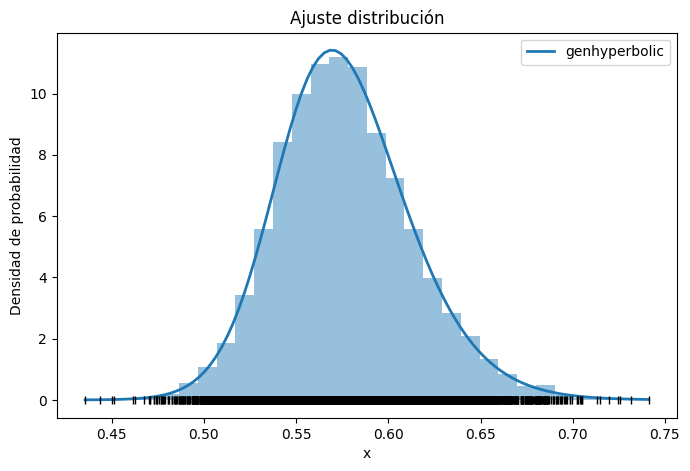

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

plot_distribucion(
    x=df_new.to_numpy(),
    nombre_distribucion=resultados['distribucion'][0],
    ax=ax
);

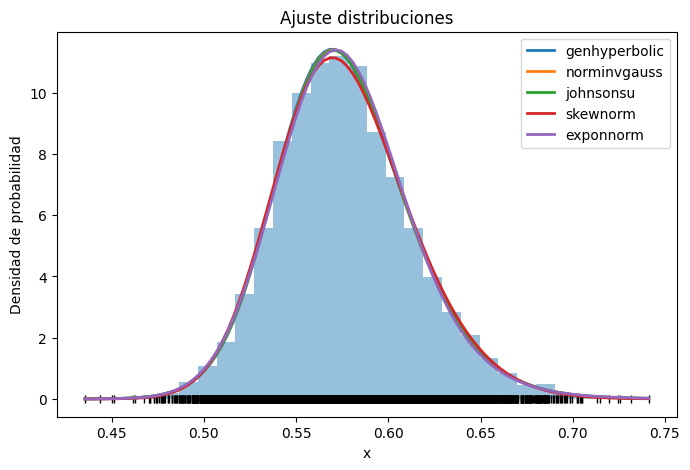

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

plot_multiple_distribuciones(
    x=df_new.to_numpy(),
    nombre_distribuciones=resultados['distribucion'][:5],
    ax=ax
);

## **Referencia Bibliografica**:

Ajuste y selección de distribuciones con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/pystats01-ajuste-distribuciones-python.html